In [1]:
import gym
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from datetime import datetime
from evolutionary_algorithms import EvolutionStrategy
from policies import NN


np.set_printoptions(precision=5, suppress=True)

In [2]:
algorithm = 'ES'
n_gens = 1000
hidden_units = [64, 64]
pop_size = 100

results = np.load(f'..\\results\\ES_hidden_units_{hidden_units}_pop_size_100\\temp_gen_1000.npz')
pop = results['pop']
results.files

['pop', 'best_fitness_per_gen', 'avg_fitness_per_gen']

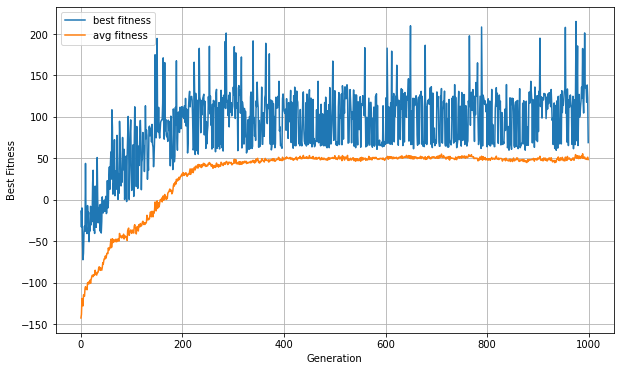

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(n_gens), results['best_fitness_per_gen'][:n_gens], label='best fitness')
ax.plot(np.arange(n_gens), results['avg_fitness_per_gen'][:n_gens], label='avg fitness')
ax.set_ylabel('Best Fitness')
ax.set_xlabel('Generation')
ax.legend(loc='best')
ax.grid()
plt.savefig(f'.\\{algorithm}_hidden_units_{hidden_units}_pop_size_{pop_size}_plot_results.png', dpi=500)
plt.show()

In [14]:
env = gym.make("LunarLander-v2", new_step_api=True)

observation, info = env.reset(seed=np.random.randint(2**16-1), return_info=True)

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

policy = NN(input_dim=input_dim, output_dim=output_dim, hidden_units=hidden_units)
dim = policy.params_size()

frames = []
policy.set_weights(pop[:dim, 0])

total_reward = 0.0
terminated = False
while not terminated:
    # env.render()
    frames.append(env.render(mode='rgb_array'))
    action = policy(observation)
    observation, reward, terminated, truncated, _ = env.step(action)
    total_reward += reward

    if terminated:
        print(f'Last Reward {reward}')
        print(f'Reward {total_reward}')

env.close()
imageio.mimsave(os.path.join('.', f'movie_gen_{n_gens}.gif'), frames, format='GIF', fps=60)

Last Reward -100
Reward 36.153966028598916


In [10]:
np.mean(results['best_fitness_per_gen'])

89.91022292053519

In [11]:
def start_valid_island(a, thresh, window_size):
    m = a >= thresh
    me = np.r_[False,m,False]
    idx = np.flatnonzero(me[:-1]!=me[1:])
    lens = idx[1::2]-idx[::2]
    return idx[::2][(lens >= window_size).argmax()]

idx = start_valid_island(results['avg_fitness_per_gen'], 50, 5)

In [12]:
results['avg_fitness_per_gen'][idx:idx+5]

array([50.52378, 53.25445, 50.3529 , 50.26014, 50.30265])

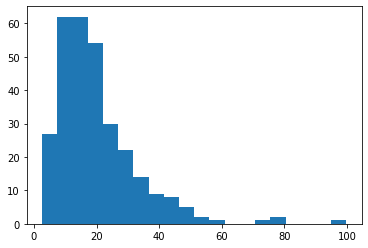

In [23]:
plt.hist(pop[-300:, 0], bins=20)
plt.show()